In [20]:
import os
import numpy as np
import cartopy.crs as ccrs
import easygems.healpix as egh
import matplotlib as mpl
import matplotlib.pyplot as plt
import xarray as xr
import colormaps as cmaps
from colormaps.utils import concat
from matplotlib.colors import ListedColormap
mpl.rcParams['figure.dpi'] = 72

# Testing HEALPix IR+IMERG Data

This notebook tests reading and visualizing HEALPix IR+IMERG data.

In [21]:
in_dir = '/pscratch/sd/w/wcmca1/GPM/healpix/test/'
# in_file = f'{in_dir}IR_IMERG_V7_1H_zoom9_20200101_20201231.zarr'
# in_file = f'{in_dir}IR_IMERG_V7_1H_zoom9_20200101_20200105.zarr'
# in_file = f'{in_dir}IR_IMERG_V7_1H_zoom9_20200101_20200110.zarr'
in_file = f'{in_dir}IR_IMERG_V7_1H_zoom9_20200101_20200102.zarr'
# in_file = f'{in_dir}IR_IMERG_V7_zoom9_20200101_20200105.zarr'
print(f"{in_file} exists: {os.path.exists(in_file)}")

# Also check if zoom 8 exists for comparison
zoom8_file = f'{in_dir}IR_IMERG_V7_1H_zoom8_20200101_20200110.zarr'
print(f"Zoom 8 file exists: {os.path.exists(zoom8_file)}")

/pscratch/sd/w/wcmca1/GPM/healpix/test/IR_IMERG_V7_1H_zoom9_20200101_20200102.zarr exists: True
Zoom 8 file exists: True


In [22]:
# Time-averaged data
H6_file = f'{in_dir}IR_IMERG_V7_6H_zoom8_20200101_20200105.zarr'
print(f"H6 file exists: {os.path.exists(H6_file)}")

ds_h6 = xr.open_zarr(H6_file)
ds_h6

H6 file exists: True


<xarray.Dataset> Size: 129MB
Dimensions:        (time: 20, cell: 786432)
Coordinates:
  * cell           (cell) int32 3MB 0 1 2 3 4 ... 786428 786429 786430 786431
    crs            int64 8B ...
  * time           (time) datetime64[ns] 160B 2020-01-01 ... 2020-01-05T18:00:00
Data variables:
    Tb             (time, cell) float32 63MB dask.array<chunksize=(20, 262144), meta=np.ndarray>
    precipitation  (time, cell) float32 63MB dask.array<chunksize=(20, 262144), meta=np.ndarray>
Attributes: (12/13)
    coarsened_from_zoom:         9
    coarsening_factor:           4
    coarsening_method:           mean
    grid_mapping:                crs
    healpix_nest:                True
    healpix_npix:                3145728
    ...                          ...
    healpix_order:               9
    original_grid:               regular_lat_lon
    processing_timestamp:        2025-10-25T16:20:58.300214
    remapping_method:            delaunay_triangulation
    source_file:                 IR_IMERG_V7_1H_zoom9_20200101_20200105.zarr
    temporal_coarsening_factor:  6

In [23]:
ds_h6.time

<xarray.DataArray 'time' (time: 20)> Size: 160B
array(['2020-01-01T00:00:00.000000000', '2020-01-01T06:00:00.000000000',
       '2020-01-01T12:00:00.000000000', '2020-01-01T18:00:00.000000000',
       '2020-01-02T00:00:00.000000000', '2020-01-02T06:00:00.000000000',
       '2020-01-02T12:00:00.000000000', '2020-01-02T18:00:00.000000000',
       '2020-01-03T00:00:00.000000000', '2020-01-03T06:00:00.000000000',
       '2020-01-03T12:00:00.000000000', '2020-01-03T18:00:00.000000000',
       '2020-01-04T00:00:00.000000000', '2020-01-04T06:00:00.000000000',
       '2020-01-04T12:00:00.000000000', '2020-01-04T18:00:00.000000000',
       '2020-01-05T00:00:00.000000000', '2020-01-05T06:00:00.000000000',
       '2020-01-05T12:00:00.000000000', '2020-01-05T18:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
    crs      int64 8B ...
  * time     (time) datetime64[ns] 160B 2020-01-01 ... 2020-01-05T18:00:00

In [24]:
# Read data
ds = xr.open_zarr(in_file)
ds = ds.pipe(egh.attach_coords)
ds 

<xarray.Dataset> Size: 1GB
Dimensions:        (time: 48, cell: 3145728)
Coordinates:
  * time           (time) datetime64[ns] 384B 2020-01-01 ... 2020-01-02T23:00:00
    crs            int64 8B 0
  * cell           (cell) int32 13MB 0 1 2 3 ... 3145724 3145725 3145726 3145727
    lat            (cell) float64 25MB 0.0746 0.1492 0.1492 ... -0.1492 -0.0746
    lon            (cell) float64 25MB 45.0 45.09 44.91 ... 315.1 314.9 315.0
Data variables:
    Tb             (time, cell) float32 604MB dask.array<chunksize=(24, 262144), meta=np.ndarray>
    precipitation  (time, cell) float32 604MB dask.array<chunksize=(24, 262144), meta=np.ndarray>
Attributes:
    grid_mapping:      crs
    healpix_nest:      True
    healpix_npix:      3145728
    healpix_nside:     512
    healpix_order:     9
    original_grid:     regular_latlon
    remapping_method:  delaunay_triangulation

In [25]:
ds8 = xr.open_zarr(zoom8_file)
ds8

<xarray.Dataset> Size: 2GB
Dimensions:        (time: 240, cell: 786432)
Coordinates:
  * cell           (cell) int32 3MB 0 1 2 3 4 ... 786428 786429 786430 786431
    crs            int64 8B ...
  * time           (time) datetime64[ns] 2kB 2020-01-01 ... 2020-01-10T23:00:00
Data variables:
    Tb             (time, cell) float32 755MB dask.array<chunksize=(24, 262144), meta=np.ndarray>
    precipitation  (time, cell) float32 755MB dask.array<chunksize=(24, 262144), meta=np.ndarray>
Attributes: (12/13)
    coarsened_from_zoom:         9
    coarsening_factor:           4
    coarsening_method:           mean
    grid_mapping:                crs
    healpix_nest:                True
    healpix_npix:                3145728
    ...                          ...
    healpix_order:               9
    original_grid:               regular_lat_lon
    processing_timestamp:        2025-10-25T16:26:17.574328
    remapping_method:            delaunay_triangulation
    source_file:                 IR_IMERG_V7_1H_zoom9_20200101_20200110.zarr
    temporal_coarsening_factor:  None

In [26]:
ds.time.isel(time=slice(0, 24))

<xarray.DataArray 'time' (time: 24)> Size: 192B
array(['2020-01-01T00:00:00.000000000', '2020-01-01T01:00:00.000000000',
       '2020-01-01T02:00:00.000000000', '2020-01-01T03:00:00.000000000',
       '2020-01-01T04:00:00.000000000', '2020-01-01T05:00:00.000000000',
       '2020-01-01T06:00:00.000000000', '2020-01-01T07:00:00.000000000',
       '2020-01-01T08:00:00.000000000', '2020-01-01T09:00:00.000000000',
       '2020-01-01T10:00:00.000000000', '2020-01-01T11:00:00.000000000',
       '2020-01-01T12:00:00.000000000', '2020-01-01T13:00:00.000000000',
       '2020-01-01T14:00:00.000000000', '2020-01-01T15:00:00.000000000',
       '2020-01-01T16:00:00.000000000', '2020-01-01T17:00:00.000000000',
       '2020-01-01T18:00:00.000000000', '2020-01-01T19:00:00.000000000',
       '2020-01-01T20:00:00.000000000', '2020-01-01T21:00:00.000000000',
       '2020-01-01T22:00:00.000000000', '2020-01-01T23:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 192B 2020-01-01 ... 2020-01-01T23:00:00
    crs      int64 8B 0

In [27]:
ds.time[-10:]

<xarray.DataArray 'time' (time: 10)> Size: 80B
array(['2020-01-02T14:00:00.000000000', '2020-01-02T15:00:00.000000000',
       '2020-01-02T16:00:00.000000000', '2020-01-02T17:00:00.000000000',
       '2020-01-02T18:00:00.000000000', '2020-01-02T19:00:00.000000000',
       '2020-01-02T20:00:00.000000000', '2020-01-02T21:00:00.000000000',
       '2020-01-02T22:00:00.000000000', '2020-01-02T23:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 80B 2020-01-02T14:00:00 ... 2020-01-02T23:...
    crs      int64 8B 0

In [28]:
# ds.time.dt.strftime('%Y')
ds.time.isel(time=0).dt.strftime('%Y-%m-%d %H:%M').item()

'2020-01-01 00:00'

<Figure size 460.8x345.6 with 0 Axes>

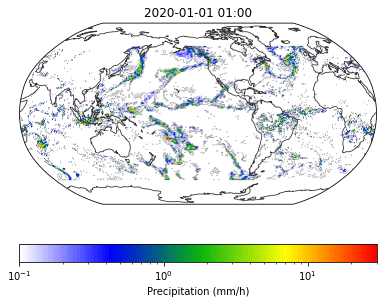

In [29]:
itime = 1
im = egh.healpix_show(ds.precipitation.isel(time=itime),norm=mpl.colors.LogNorm(vmin=10e-2, vmax=30), cmap=cmaps.WhBlGrYeRe)
time_str = ds.time.isel(time=itime).dt.strftime('%Y-%m-%d %H:%M').item()
plt.title(time_str)
plt.colorbar(im, orientation='horizontal', label='Precipitation (mm/h)')

## Check difference between two 30-min times for the same hour

(np.datetime64('2020-01-01T01:00:00.000000000'), np.datetime64('2020-01-01T00:00:00.000000000'))
Max precipitation difference: 26.093135833740234


<Figure size 460.8x345.6 with 0 Axes>

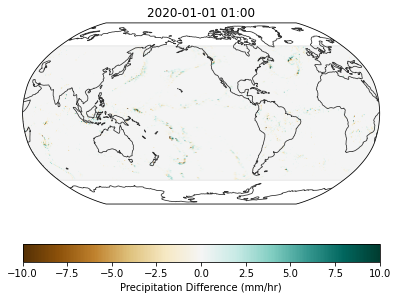

In [30]:
# Check difference in precipitation between two 30-min time steps within the same hour
# The results should be identical because the 30-min IMERG has been averaged over the hour
print((ds.time.isel(time=1).values, ds.time.isel(time=0).values))
diff_precip = ds.precipitation.isel(time=1) - ds.precipitation.isel(time=0)
print(f"Max precipitation difference: {diff_precip.max().values}")

im = egh.healpix_show(diff_precip, vmin=-10, vmax=10, cmap='BrBG')
time_str = ds.time.isel(time=1).dt.strftime('%Y-%m-%d %H:%M').item()
plt.title(time_str)
plt.colorbar(im, orientation='horizontal', label='Precipitation Difference (mm/hr)')

(np.datetime64('2020-01-01T01:00:00.000000000'), np.datetime64('2020-01-01T00:00:00.000000000'))
Max Tb difference: 278.5952453613281


<Figure size 460.8x345.6 with 0 Axes>

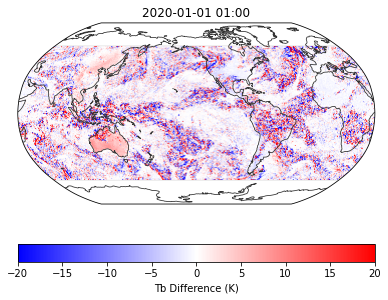

In [31]:
# Check Tb difference between two 30-min time steps within the same hour
print((ds.time.isel(time=1).values, ds.time.isel(time=0).values))
diff_Tb = ds.Tb.isel(time=1) - ds.Tb.isel(time=0)
print(f"Max Tb difference: {diff_Tb.max().values}")

im = egh.healpix_show(diff_Tb, vmin=-20, vmax=20, cmap='bwr')
time_str = ds.time.isel(time=1).dt.strftime('%Y-%m-%d %H:%M').item()
plt.title(time_str)
plt.colorbar(im, orientation='horizontal', label='Tb Difference (K)')

In [32]:
def concat_cmaps(cmaps_list, ratios, discrete=256, trim_left=0.0, trim_right=0.0):
    """
    Concatenate multiple colormaps with optional trimming.
    
    Parameters:
    -----------
    cmaps_list : list
        List of colormaps to concatenate
    ratios : list
        List of ratios for each colormap (should sum to 1.0)
    discrete : int
        Total number of discrete colors in the output
    trim_left : float
        Fraction to trim from the left (start) of each colormap (0.0 to 1.0)
    trim_right : float
        Fraction to trim from the right (end) of each colormap (0.0 to 1.0)
    """
    total_colors = discrete
    all_colors = []
    
    for i, (cmap, ratio) in enumerate(zip(cmaps_list, ratios)):
        n_colors = int(total_colors * ratio)
        
        # Calculate the range to sample from, accounting for trimming
        start = trim_left
        end = 1.0 - trim_right
        
        # Sample colors from the trimmed range
        colors = cmap(np.linspace(start, end, n_colors))
        all_colors.append(colors)
    
    return ListedColormap(np.vstack(all_colors))

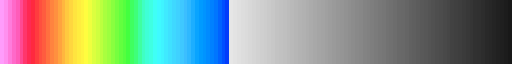

In [33]:
c1 = cmaps.GMT_wysiwygcont.reversed()
c2 = cmaps.gray.reversed()
cmap_tb = concat_cmaps([c1, c2], [0.45, 0.55], discrete=135, trim_left=0.1, trim_right=0.1)
cmap_tb

Text(0.5, 0.98, '2020-01-01 01:00')

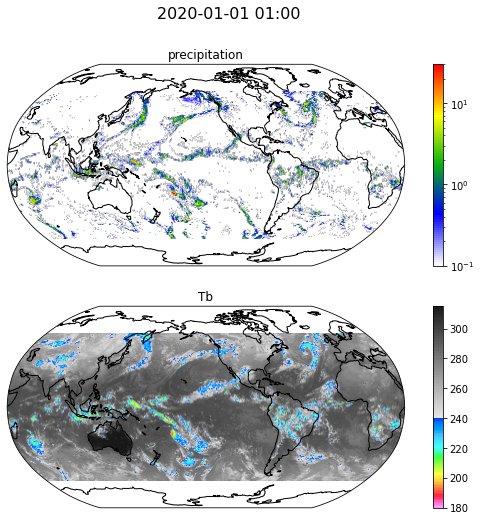

In [34]:
itime = 1
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(10, 8), subplot_kw={'projection': ccrs.Robinson(central_longitude=-137)})
def egh_plot(data, ax, **kwargs):
    ax.set_title(data.name)
    ax.set_global()
    im = egh.healpix_show(data, ax=ax, **kwargs)
    plt.colorbar(im, ax=ax)
    ax.coastlines()

time_str = ds.time.isel(time=itime).dt.strftime('%Y-%m-%d %H:%M').item()
egh_plot(ds.precipitation.isel(time=itime), ax=ax0, norm=mpl.colors.LogNorm(vmin=10e-2, vmax=30), cmap=cmaps.WhBlGrYeRe)
egh_plot(ds.Tb.isel(time=itime), ax=ax1, cmap=cmap_tb, vmin=180, vmax=315)
fig.suptitle(f"{time_str}", fontsize=16)

Text(0.5, 0.98, '2020-01-01 01:00 (zoom 8)')

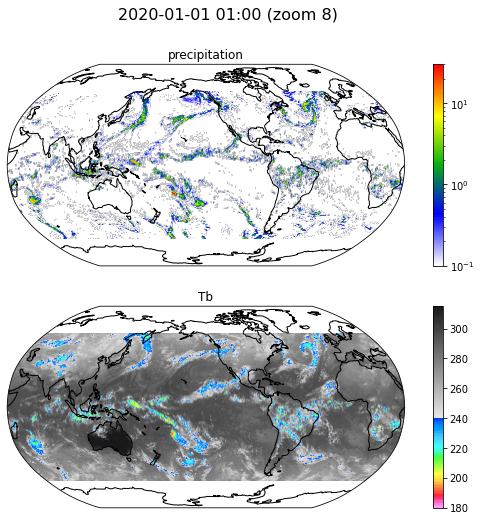

In [35]:
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(10, 8), subplot_kw={'projection': ccrs.Robinson(central_longitude=-137)})

time_str = ds8.time.isel(time=itime).dt.strftime('%Y-%m-%d %H:%M').item()
egh_plot(ds8.precipitation.isel(time=itime), ax=ax0, norm=mpl.colors.LogNorm(vmin=10e-2, vmax=30), cmap=cmaps.WhBlGrYeRe)
egh_plot(ds8.Tb.isel(time=itime), ax=ax1, cmap=cmap_tb, vmin=180, vmax=315)
fig.suptitle(f"{time_str} (zoom 8)", fontsize=16)

<Figure size 460.8x345.6 with 0 Axes>

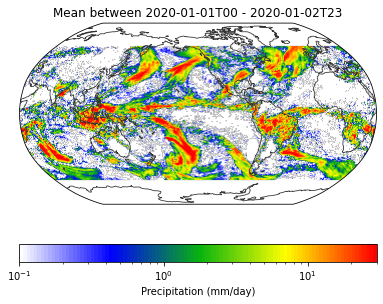

In [36]:
time_str1 = '2020-01-01T00'
time_str2 = '2020-01-02T23'
# time_str1 = '2020-08-01T00'
# time_str2 = '2020-08-09T23'
pcp_avg = ds.precipitation.sel(time=slice(time_str1, time_str2)).mean(dim='time') * 24
im = egh.healpix_show(pcp_avg,norm=mpl.colors.LogNorm(vmin=10e-2, vmax=30), cmap=cmaps.WhBlGrYeRe)
plt.title(f'Mean between {time_str1} - {time_str2}')
plt.colorbar(im, orientation='horizontal', label='Precipitation (mm/day)')

<Figure size 460.8x345.6 with 0 Axes>

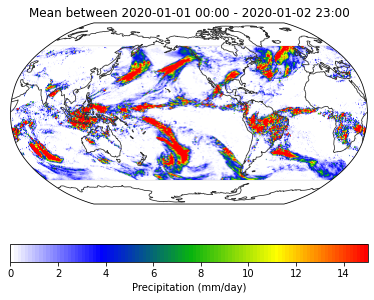

In [37]:
pcp_avg = ds.precipitation.mean(dim='time') * 24
im = egh.healpix_show(pcp_avg,norm=mpl.colors.Normalize(vmin=0, vmax=15), cmap=cmaps.WhBlGrYeRe)
time_str1 = ds.time.min().dt.strftime('%Y-%m-%d %H:%M').item()
time_str2 = ds.time.max().dt.strftime('%Y-%m-%d %H:%M').item()
plt.title(f'Mean between {time_str1} - {time_str2}')
plt.colorbar(im, orientation='horizontal', label='Precipitation (mm/day)')

<Figure size 460.8x345.6 with 0 Axes>

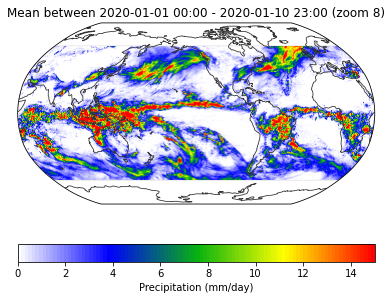

In [38]:
pcp_avg = ds8.precipitation.mean(dim='time') * 24
im = egh.healpix_show(pcp_avg,norm=mpl.colors.Normalize(vmin=0, vmax=15), cmap=cmaps.WhBlGrYeRe)
time_str1 = ds8.time.min().dt.strftime('%Y-%m-%d %H:%M').item()
time_str2 = ds8.time.max().dt.strftime('%Y-%m-%d %H:%M').item()
plt.title(f'Mean between {time_str1} - {time_str2} (zoom 8)')
plt.colorbar(im, orientation='horizontal', label='Precipitation (mm/day)')